In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import rfft

In [45]:
data208 = pd.read_csv(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Annotations_NormalAbnormalBeats\208.csv",  header=None, names=["time","sample_no","label"])

In [46]:
feats = {}
for idx, row in data208.iterrows():
    idx = int((row['sample_no'] - 1)/1800) + 1
    if idx not in feats:
        if row['label'] == 'N':
            feats[idx] = {'N' : 1, 'V' : 0, 'C' : 1}
        else:
            feats[idx] = {'N' : 0, 'V' : 1, 'C' : 1}
    else:    
        diN = feats[idx]['N']
        diV = feats[idx]['V']
        diC = feats[idx]['C']
        if row['label'] == 'N':
            feats[idx]['N'] = diN + 1
        else:
            feats[idx]['V'] = diV + 1
        feats[idx]['C'] = diC + 1

In [47]:
qrs208 = pd.read_csv(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Annotations_QRSLocation\208.csv",  header=None, names=["sample_no"])

In [48]:
beats = {}
for i, row in qrs208.iterrows():
    idx = int((row['sample_no'] - 1)/1800) + 1
    if idx not in beats:
        beats[idx] = 0
    beats[idx] = beats[idx] + 1

In [49]:
amp208 = pd.read_csv(r"C:\Users\SAM-PC\Downloads\HBA_HW\MitArrhythmia\Data\208.txt", header=None, names=['amplitude'])

In [50]:
N = 8
rfft_coeffs = {}

for i in range(1, amp208.size + 1):
    if i+1800 > amp208.size:
        frame = amp208['amplitude'][i:amp208.size+1].tolist()
    else:
        frame = amp208['amplitude'][i:i+1801].tolist()
    
    rfft_coeffs[(i-1)/1800+1] = rfft(frame, N)
    i = i + 1800

In [51]:
normal_frame_idx = []
ventricular_frame_idx = []

for i in feats:
    if feats[i]['N'] > feats[i]['V']:
        normal_frame_idx.append(i)
    elif feats[i]['N'] < feats[i]['V']:
        ventricular_frame_idx.append(i)

normal_beatcount = []
normal_ibi = []
ventricular_beatcount = []
ventricular_ibi = []
normal_rfft_coeffs = []
ventricular_rfft_coeffs = []

for i in normal_frame_idx:
    normal_beatcount.append(beats[i])
    normal_ibi.append(10/(beats[i]))
    
for i in ventricular_frame_idx:
    ventricular_beatcount.append(beats[i])
    ventricular_ibi.append(10/(beats[i]))

for j in normal_frame_idx:
    normal_rfft_coeffs.append(rfft_coeffs[j])

for j in ventricular_frame_idx:
    ventricular_rfft_coeffs.append(rfft_coeffs[j])

In [52]:
normal_rfft_coeffs = np.asmatrix(normal_rfft_coeffs)
ventricular_rfft_coeffs = np.asmatrix(ventricular_rfft_coeffs)
#print(normal_rfft_coeffs.shape)
#print(ventricular_rfft_coeffs.shape)

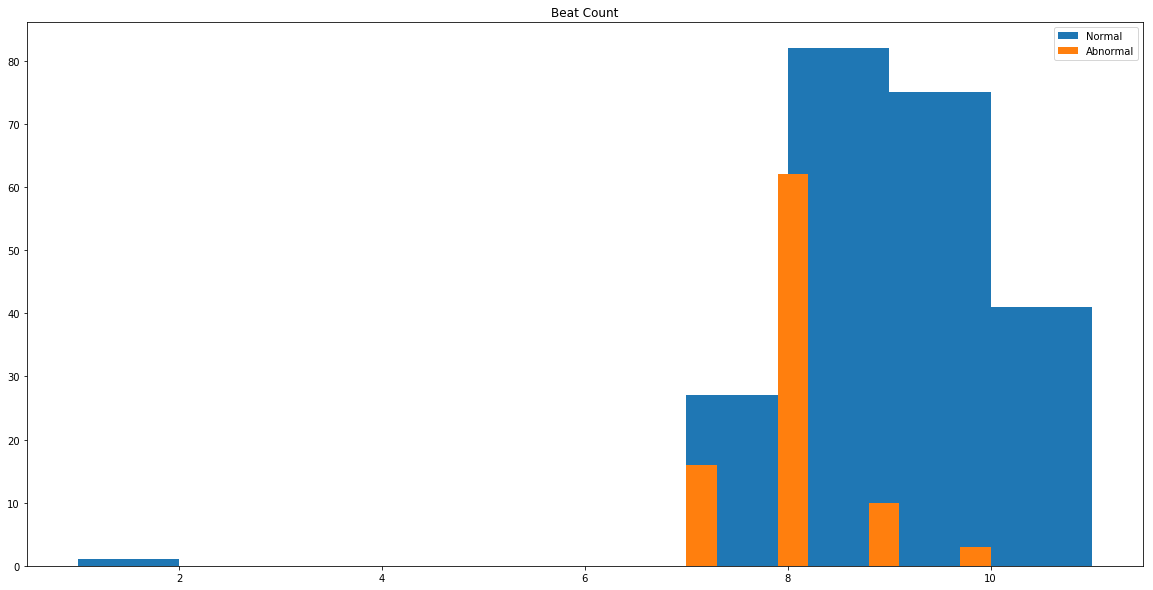

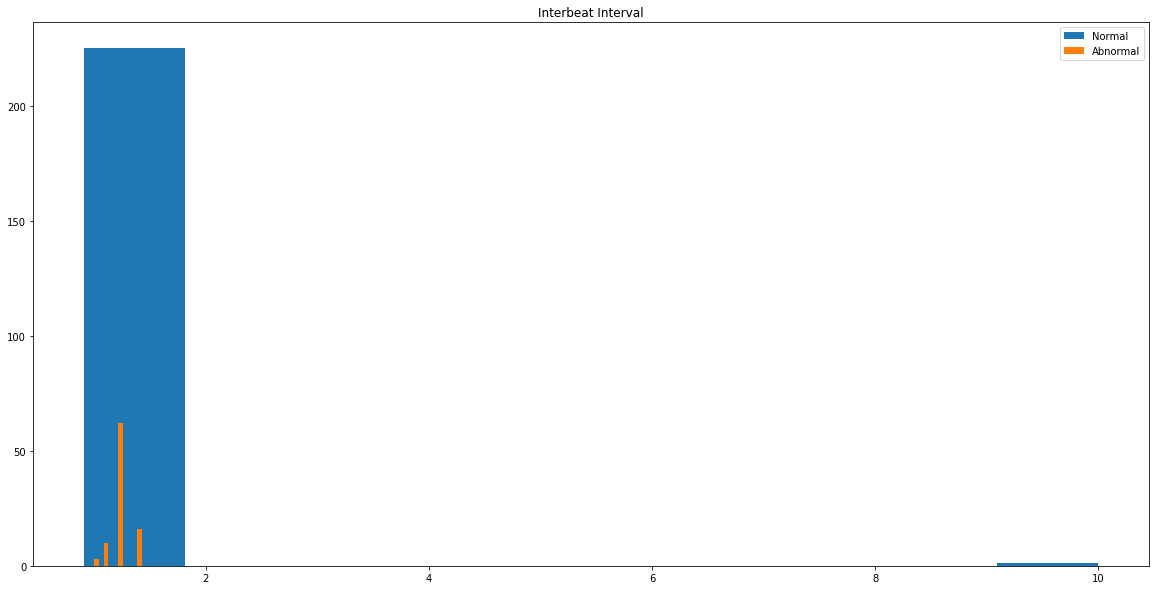

In [57]:
plt.figure(figsize=(20,10))
plt.hist(normal_beatcount, 10, label='Normal')
plt.hist(ventricular_beatcount, 10, label='Abnormal')
plt.title('Beat Count')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(20,10))
plt.hist(normal_ibi, 10, label='Normal')
plt.hist(ventricular_ibi, 10, label='Abnormal')
plt.title('Interbeat Interval')
plt.legend(loc='best')
plt.show()

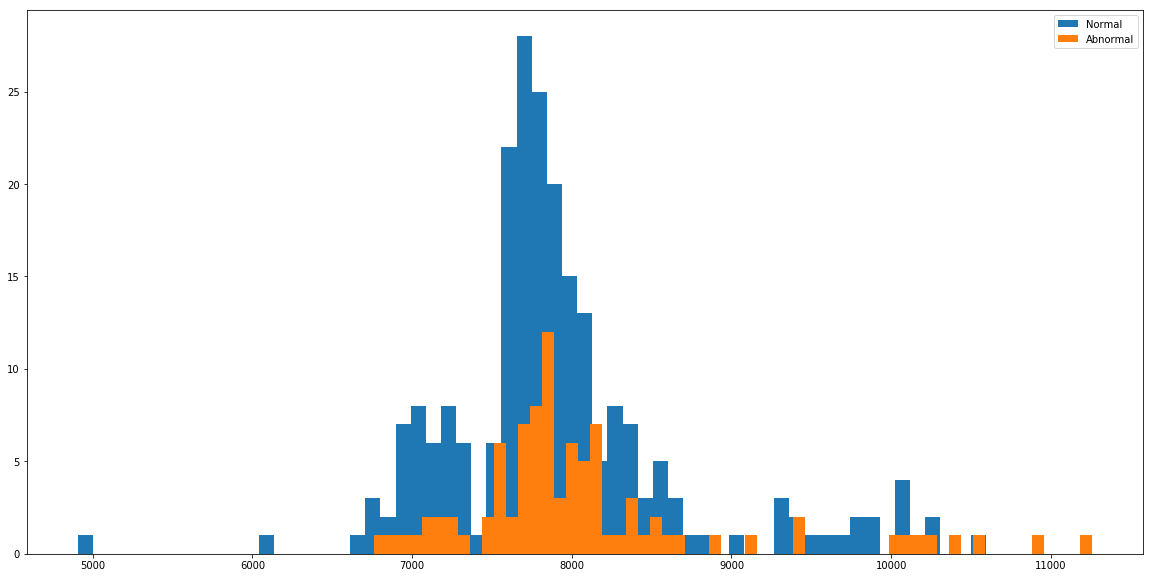

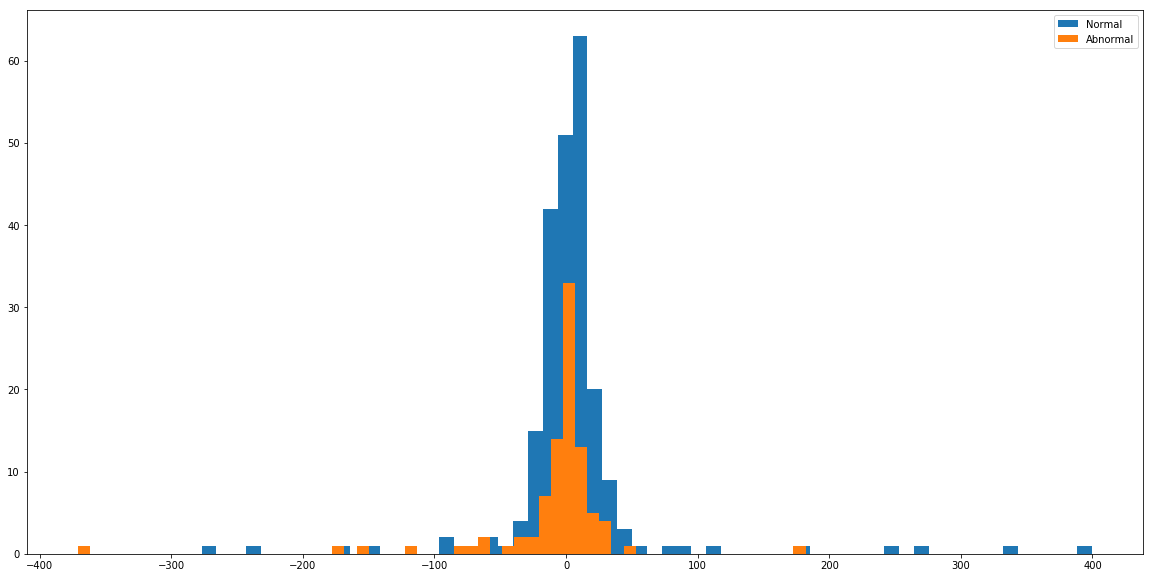

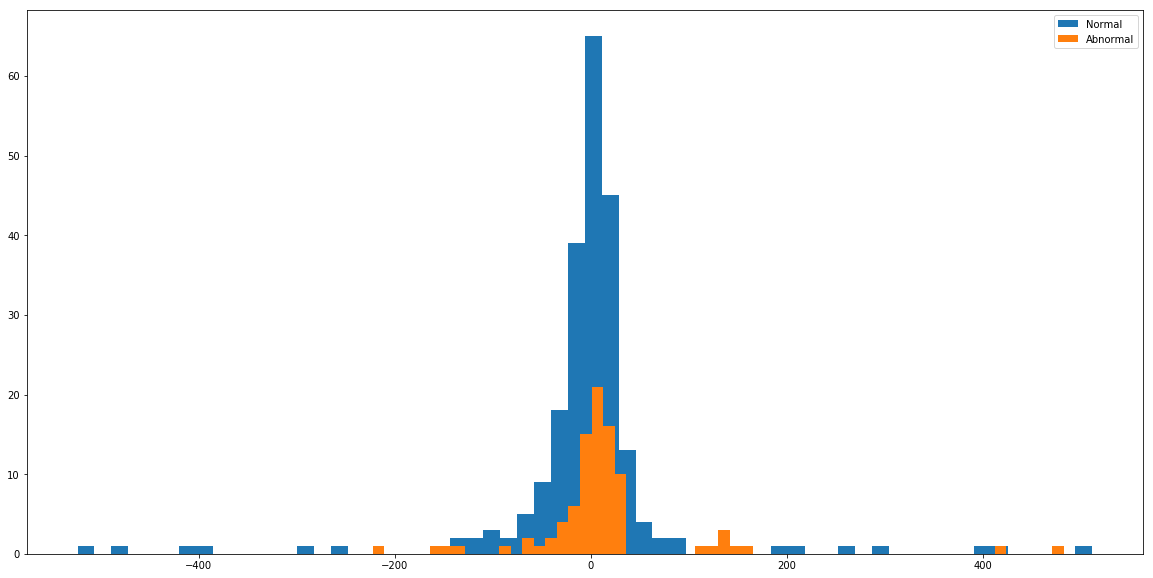

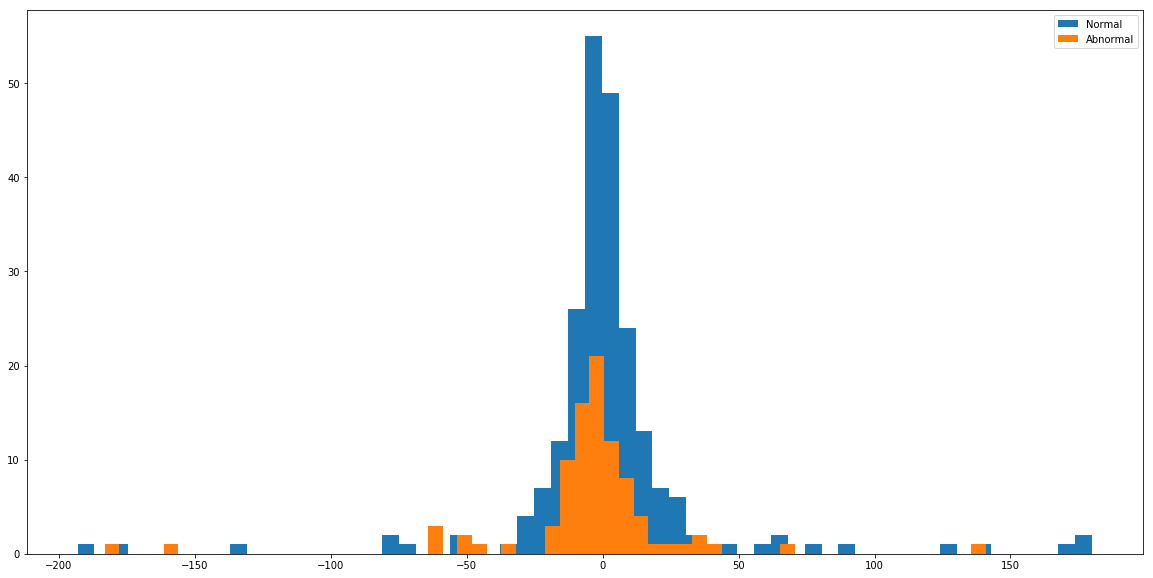

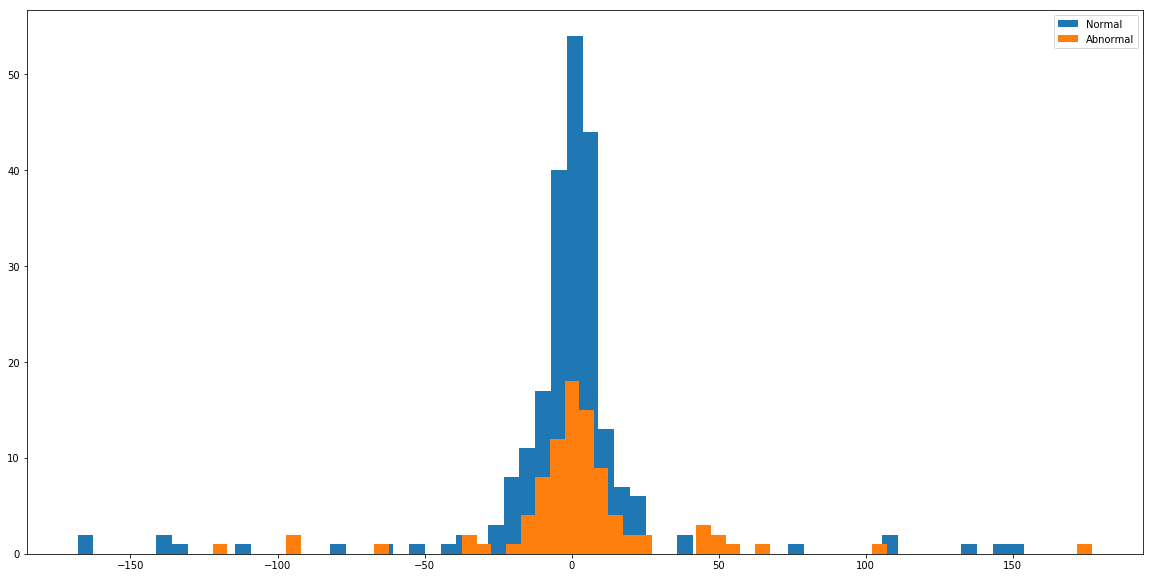

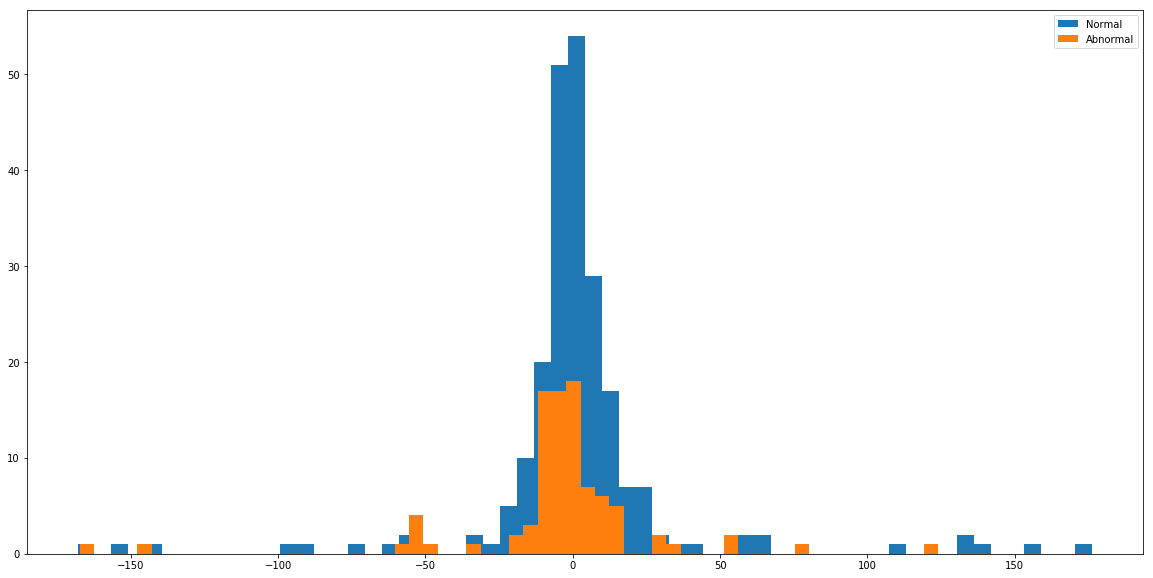

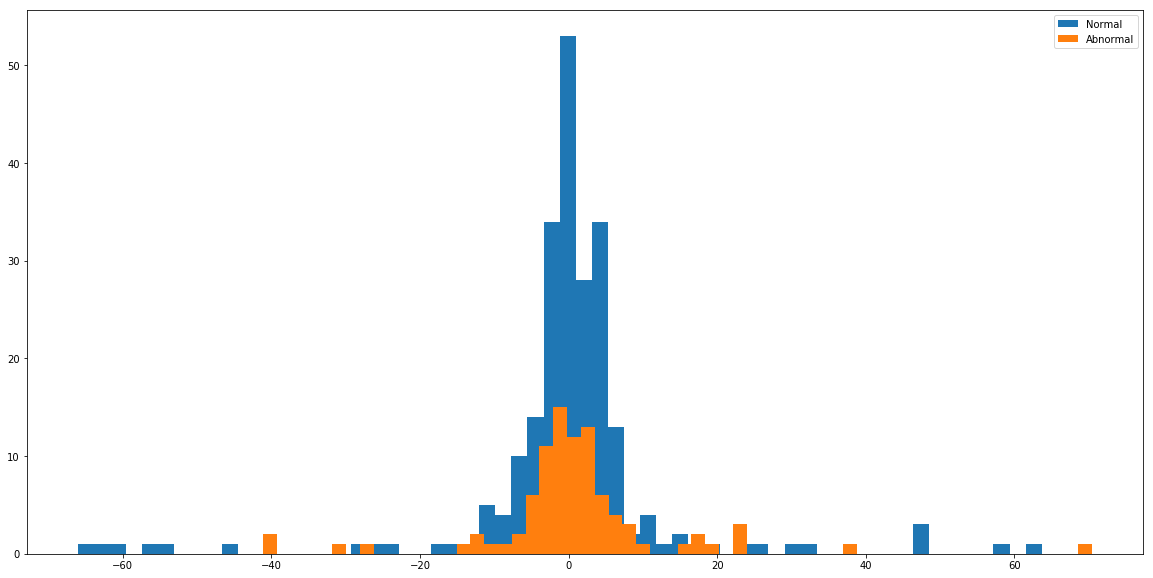

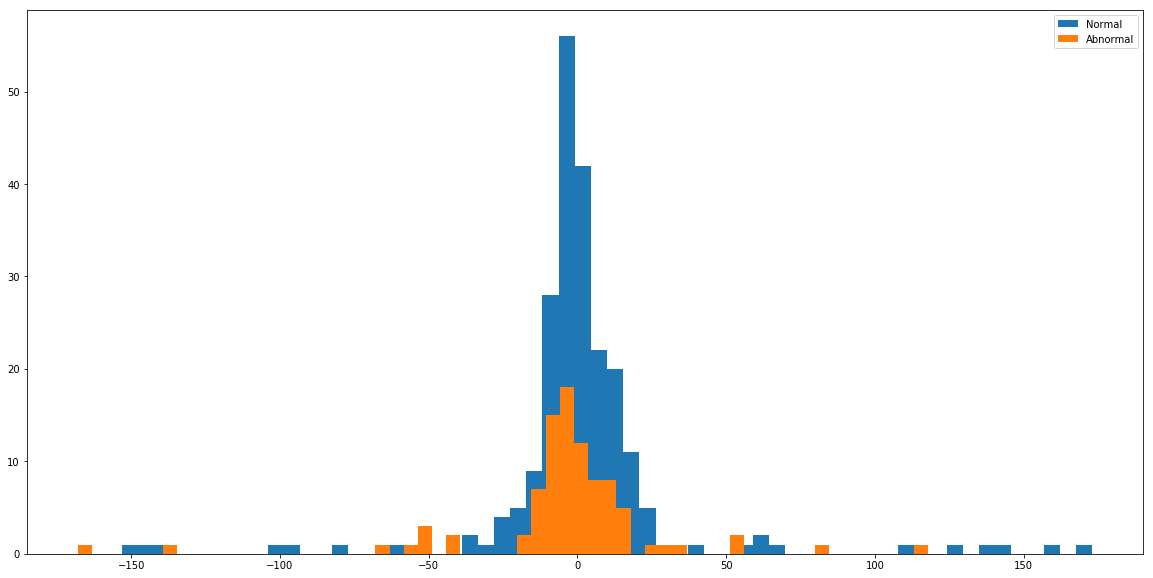

In [70]:
for i in range (8):
    plt.figure(i+3,figsize=(20,10))
    plt.hist(normal_rfft_coeffs[:,i], 60, label='Normal')
    plt.hist(ventricular_rfft_coeffs[:,i], 60, label='Abnormal')
    plt.legend(loc='best')
    plt.show()

In [71]:
from scipy import stats
ttest_beats = stats.ttest_ind(normal_beatcount,ventricular_beatcount)
ttest_interval = stats.ttest_ind(normal_ibi,ventricular_ibi)
print("Ttest for Beat Count: "+str(ttest_beats))
print("Ttest for Beat Interval: "+str(ttest_interval))

Ttest for Beat Count: Ttest_indResult(statistic=4.661003172536448, pvalue=4.652167257838253e-06)
Ttest for Beat Interval: Ttest_indResult(statistic=-0.6752256180967557, pvalue=0.5000277689559829)


In [68]:
ttest_coefficients1 = stats.ttest_ind(normal_rfft_coeffs[:,0],ventricular_rfft_coeffs[:,0])
print("Ttest for Fourier Coefficient 1: "+str(ttest_coefficients1))
ttest_coefficients2 = stats.ttest_ind(normal_rfft_coeffs[:,1],ventricular_rfft_coeffs[:,1])
print("Ttest for Fourier Coefficient 2: "+str(ttest_coefficients2))
ttest_coefficients3 = stats.ttest_ind(normal_rfft_coeffs[:,2],ventricular_rfft_coeffs[:,2])
print("Ttest for Fourier Coefficient 3: "+str(ttest_coefficients3))
ttest_coefficients4 = stats.ttest_ind(normal_rfft_coeffs[:,3],ventricular_rfft_coeffs[:,3])
print("Ttest for Fourier Coefficient 4: "+str(ttest_coefficients4))
ttest_coefficients5 = stats.ttest_ind(normal_rfft_coeffs[:,4],ventricular_rfft_coeffs[:,4])
print("Ttest for Fourier Coefficient 5: "+str(ttest_coefficients5))
ttest_coefficients6 = stats.ttest_ind(normal_rfft_coeffs[:,5],ventricular_rfft_coeffs[:,5])
print("Ttest for Fourier Coefficient 6: "+str(ttest_coefficients6))
ttest_coefficients7 = stats.ttest_ind(normal_rfft_coeffs[:,6],ventricular_rfft_coeffs[:,6])
print("Ttest for Fourier Coefficient 7: "+str(ttest_coefficients7))
ttest_coefficients8 = stats.ttest_ind(normal_rfft_coeffs[:,7],ventricular_rfft_coeffs[:,7])
print("Ttest for Fourier Coefficient 8: "+str(ttest_coefficients8))

Ttest for Fourier Coefficient 1: Ttest_indResult(statistic=array([-2.06422438]), pvalue=array([0.03981491]))
Ttest for Fourier Coefficient 2: Ttest_indResult(statistic=array([1.85467942]), pvalue=array([0.06457634]))
Ttest for Fourier Coefficient 3: Ttest_indResult(statistic=array([-1.46617743]), pvalue=array([0.14359749]))
Ttest for Fourier Coefficient 4: Ttest_indResult(statistic=array([1.56632311]), pvalue=array([0.11827699]))
Ttest for Fourier Coefficient 5: Ttest_indResult(statistic=array([-0.81017369]), pvalue=array([0.41845198]))
Ttest for Fourier Coefficient 6: Ttest_indResult(statistic=array([1.31950913]), pvalue=array([0.1879572]))
Ttest for Fourier Coefficient 7: Ttest_indResult(statistic=array([-0.57401882]), pvalue=array([0.5663647]))
Ttest for Fourier Coefficient 8: Ttest_indResult(statistic=array([1.20305719]), pvalue=array([0.22985762]))
